In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [23]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
Tesla = yf.Ticker('TSLA')

In [5]:
tesla_data = Tesla.history(period="max")

In [12]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [22]:
import pandas as pd
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_response = requests.get(tesla_url)
tesla_soup = BeautifulSoup(tesla_response.text, 'html.parser')
tesla_table = tesla_soup.find("table")

tesla_data2 = []

for row in tesla_table.find_all("tr")[1:]:
    tesla_row_data = row.find_all("td")
    tesla_data2.append(tesla_row_data)

tesla_revenue = pd.DataFrame(tesla_data2)

tesla_revenue.tail()

,0,1
8,[2013],"[$2,013]"
9,[2012],[$413]
10,[2011],[$204]
11,[2010],[$117]
12,[2009],[$112]


In [32]:
def make_graph(stock_data, revenue_data, title):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Stock Data", "Revenue Data"))

    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Close Price'), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data.index, y=revenue_data['Revenue'], name='Revenue'), row=2, col=1)

    fig.update_layout(title_text=title, title_x=0.5)
    fig.show()

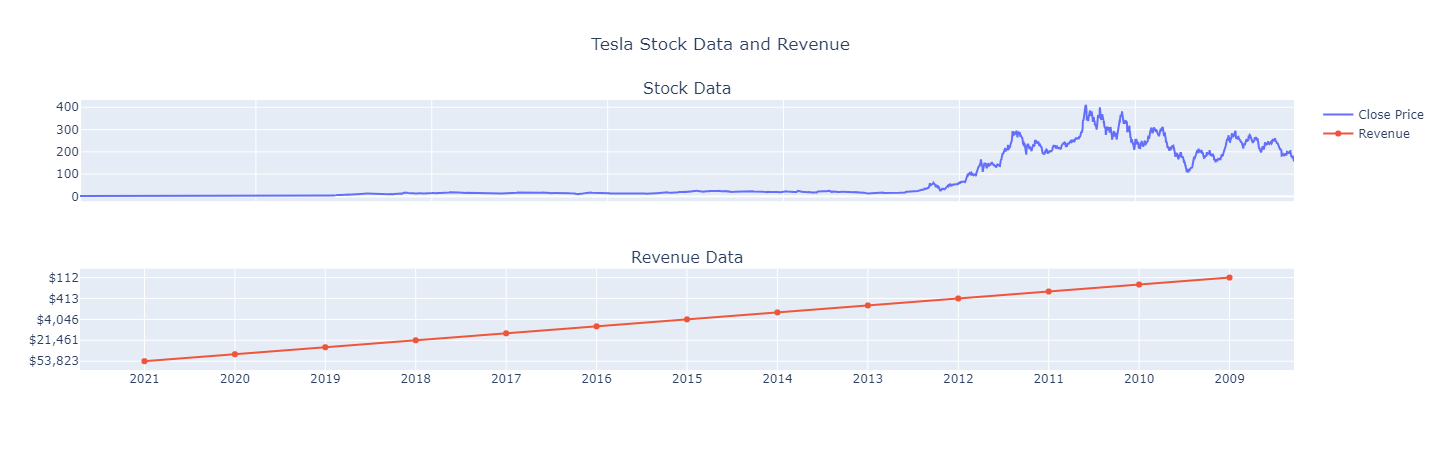

In [33]:
tesla_revenue = pd.DataFrame(tesla_data2, columns=['Date', 'Revenue'])
tesla_revenue.set_index('Date', inplace=True)

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data and Revenue')

In [10]:
GameStop = yf.Ticker('TSLA')

In [11]:
gme_data = GameStop.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [21]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_response = requests.get(gme_url)
gme_soup = BeautifulSoup(gme_response.text, 'html.parser')
gme_table = gme_soup.find("table")

gme_data2 = []

for row in gme_table.find_all("tr")[1:]:
    gme_row_data = row.find_all("td")
    gme_data2.append(gme_row_data)

gme_revenue = pd.DataFrame(gme_data2)

gme_revenue.tail()


,0,1
11,[2009],"[$8,806]"
12,[2008],"[$7,094]"
13,[2007],"[$5,319]"
14,[2006],"[$3,092]"
15,[2005],"[$1,843]"


In [39]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data and Revenue')

SystemError: <built-in method __deepcopy__ of numpy.ndarray object at 0x7fc5d877ce10> returned a result with an error set